# Sampling and Aliasing

This notebook shows some examples of the effect of sampling on aliasing. If you want to perform strided convolution, how far apart can your strides be while still avoiding aliasing? We examine this by seeing whether, given that your sampling every, e.g., 20 pixels, can you interpolate to the function values at the remaining pixels?

In [1]:
import pooling
import numpy as np
import matplotlib.pyplot as plt
import torch

%load_ext autoreload
%autoreload 2
%matplotlib inline

# Successful sampling

Here, we'll show an example of good sampling -- it's fine enough that we can successfully use linear interpolation to reconstruct the function centered at each pixel.

We'll use the default function, `po.simul.pooling.gaussian`, which is a simple Gaussian with a standard deviation of 1. We'll examine this function on a domain of `[-5, 5]`, and sample it every `.5`. Because this is a `torch` function, our `x` value should be `torch.linspace` (if it was a `numpy` function, `x` should be `np.linspace` instead).

Under the hood, this function uses `np.linalg.lstsq` to use regression and solve the interpolation.

In [2]:
x = torch.linspace(-5, 5, 101)
sampled, full, interps, coeffs, residuals = pooling.sampling.check_sampling(.5, x=x)

Let's look at the residuals, the error in each reconstruction. We can see there's problems at the boundaries, but that all the error is on the order of `1e-12`, which is pretty good!

<StemContainer object of 3 artists>

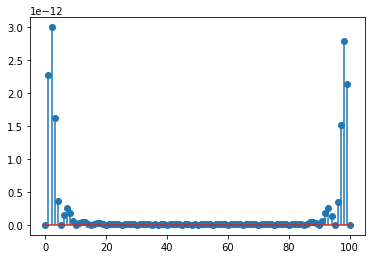

In [3]:
plt.stem(residuals, use_line_collection=True)

Let's look at some of the coefficients used to do this interpolation. We can see that some of these just have a `1` and `0` everywhere else -- this corresponds to interpolating the function to one of our sample points. Things get a little more complicated elsewhere.

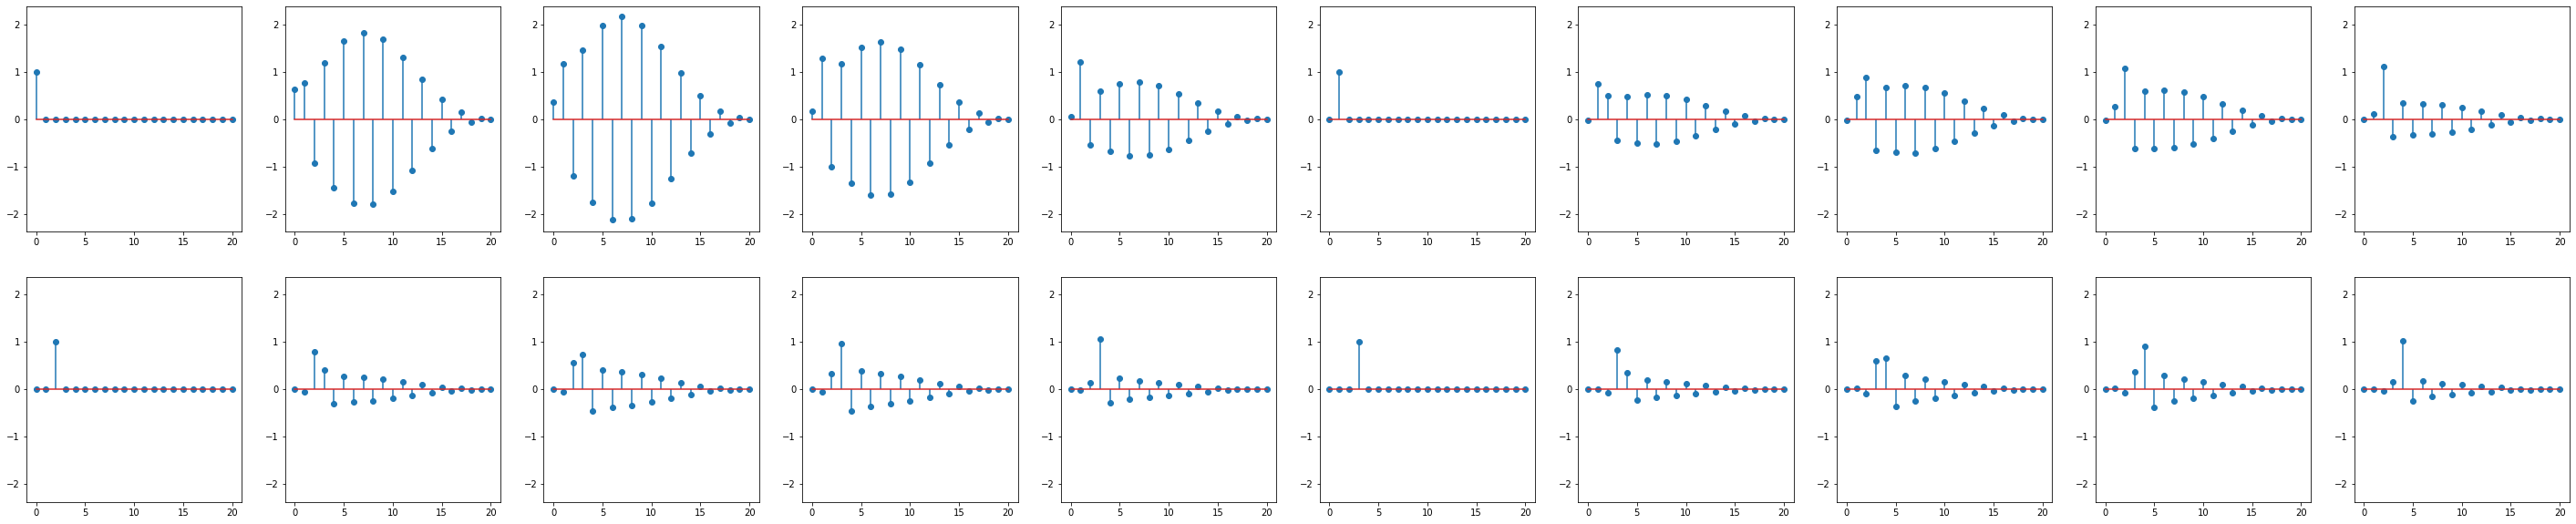

In [4]:
fig = pooling.sampling.plot_coeffs(coeffs[:20], 10)

Let's look at one of our interpolated functions, centered at `x=0`. We can see it looks pretty good, and the red dot shows us that the error is low as well.

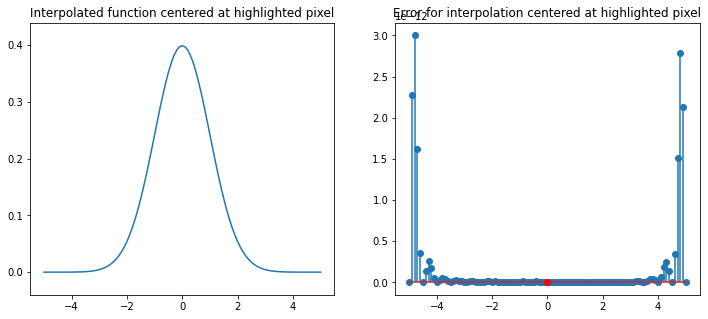

In [5]:
pooling.sampling.interpolation_plot(interps, residuals, None, 0, x);

Now let's look at a movie that shows each of these interpolations, with the actual values as a dotted line in the background. We won't be able to tell the difference!

In [6]:
anim = pooling.sampling.create_movie(interps, residuals, x, full=full)
pooling.utils.convert_anim_to_html(anim)

# Unsuccessful sampling

Alright, that was pretty boring, so let's do this whole thing again, but with sparser sampling and see that the interpolation does not look as good.

Let's double the spacing of our sampling, to every `2`.

In [7]:
x = torch.linspace(-5, 5, 101)
sampled, full, interps, coeffs, residuals = pooling.sampling.check_sampling(2, x=x)

This looks much worse, but we note that it's periodic, going to down zero at each sample point.

<StemContainer object of 3 artists>

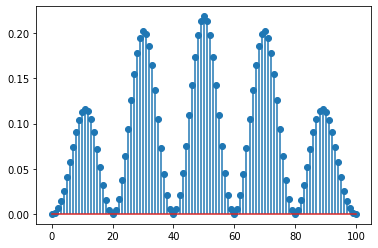

In [8]:
plt.stem(residuals, use_line_collection=True)

We won't look at our coefficients or anything here, let's jump right to the movie. We can see that the interpolation gets worse the farther away from the sample points you get, and it gets bad pretty quickly. It doesn't even look Gaussian anymore!

In [9]:
anim = pooling.sampling.create_movie(interps, residuals, x, full=full)
pooling.utils.convert_anim_to_html(anim)